<a href="https://colab.research.google.com/github/Tom-Yuen/TomY_Little_Projects/blob/main/Best_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plato asks Socrates what love is, and Socrates tells him to walk through a field and pick the most beautiful flower he finds, but he can't turn back. Plato, seeking the perfect flower, keeps moving forward and ends up with none. Socrates then explains that love, like life’s opportunities, is often missed when we constantly search for something better, causing us to overlook the beauty and value that's right in front of us.

Can we solve this problem with the assistance of machine learning and pursuit our ultimate happiness?

#Optimizing Flower Selection Strategies: Analyzing the Effectiveness of Learning Phases in a Socratic Dilemma Simulation

In an experiment inspired by Socrates' flower-picking dilemma, participants were tasked with selecting a beautiful flower from a field containing between 80 and 120 flowers, with qualities randomly distributed between 0 and 10. The participants didn't know the total number of flowers or their qualities and had to decide when to pick a flower based on limited observations.

To explore the best strategy for making this decision, we used Python in Google Colab and conducted 10,000 simulations. Participants observed a certain number of flowers (the "learning phase") before choosing the first flower that met or exceeded the highest quality observed. Our goal was to identify the most effective strategy for picking a beautiful flower, with an internal benchmark of achieving a quality score of 8 out of 10. The results showed that learning phases of 6-10 flowers were the most successful, balancing the need for information with the risk of not picking a flower at all. However, excessively long learning phases increased the risk of not picking any flower, as participants became too selective and exhausted their options.

For more details, please feel free to refer to my GitHub repository.

In [14]:
# Tom Yuen - August 2024
import numpy as np
def pick_tree_and_threshold(learning_phase):
    n_trees = np.random.randint(80, 121)
    tree_qualities = np.random.uniform(0, 10, size=n_trees)
    threshold_quality = np.max(tree_qualities[:min(learning_phase, n_trees)])

    chosen_tree_quality = 0
    for i in range(min(learning_phase, n_trees), n_trees):
        if tree_qualities[i] >= threshold_quality:
            chosen_tree_quality = tree_qualities[i]
            break

    return chosen_tree_quality, threshold_quality

def evaluate_strategy_with_threshold(learning_phases, n_simulations=10000):
    results = {}

    for learning_phase in learning_phases:
        chosen_qualities = []
        thresholds = []
        no_tree_count = 0

        for _ in range(n_simulations):
            quality, threshold = pick_tree_and_threshold(learning_phase)
            if quality == 0:
                no_tree_count += 1
            chosen_qualities.append(quality)
            thresholds.append(threshold)

        average_quality = np.mean(chosen_qualities)
        std_dev_quality = np.std(chosen_qualities)

        success_rate = np.mean([1 if q >= 8 else 0 for q in chosen_qualities])
        std_dev_success_rate = np.std([1 if q >= 8 else 0 for q in chosen_qualities])

        no_tree_percentage = no_tree_count / n_simulations

        # Analyze threshold quality distribution
        avg_threshold = np.mean(thresholds)
        std_dev_threshold = np.std(thresholds)

        results[learning_phase] = (average_quality, std_dev_quality, success_rate, std_dev_success_rate, no_tree_percentage, avg_threshold, std_dev_threshold)

    return results

# Define the learning phases to test (1 to 60)
learning_phases = list(range(1, 16)) + [20, 30, 40, 50, 60]

# Evaluate the strategy for each learning phase
results = evaluate_strategy_with_threshold(learning_phases)

# Print the results
for phase, (avg_quality, std_dev_quality, success_rate, std_dev_success_rate, no_tree_percentage, avg_threshold, std_dev_threshold) in results.items():
    print(f"Learning Phase: {phase} flowres - Average Quality: {avg_quality:.3f} ± {std_dev_quality:.3f}, "
          f"Success Rate: {success_rate:.2%} ± {std_dev_success_rate:.3f}, "
          f"End up with none: {no_tree_percentage:.2%}, "
          f"Average Threshold Quality: {avg_threshold:.3f} ± {std_dev_threshold:.3f}")


Learning Phase: 1 flowres - Average Quality: 7.362 ± 2.351, Success Rate: 51.08% ± 0.500, End up with none: 0.99%, Average Threshold Quality: 4.953 ± 2.895
Learning Phase: 2 flowres - Average Quality: 8.109 ± 2.046, Success Rate: 66.54% ± 0.472, End up with none: 2.01%, Average Threshold Quality: 6.649 ± 2.368
Learning Phase: 3 flowres - Average Quality: 8.439 ± 1.992, Success Rate: 75.13% ± 0.432, End up with none: 2.97%, Average Threshold Quality: 7.503 ± 1.915
Learning Phase: 4 flowres - Average Quality: 8.597 ± 2.061, Success Rate: 80.29% ± 0.398, End up with none: 3.91%, Average Threshold Quality: 7.992 ± 1.646
Learning Phase: 5 flowres - Average Quality: 8.651 ± 2.261, Success Rate: 84.11% ± 0.366, End up with none: 5.43%, Average Threshold Quality: 8.377 ± 1.383
Learning Phase: 6 flowres - Average Quality: 8.662 ± 2.399, Success Rate: 85.48% ± 0.352, End up with none: 6.39%, Average Threshold Quality: 8.592 ± 1.240
Learning Phase: 7 flowres - Average Quality: 8.670 ± 2.507, Succ

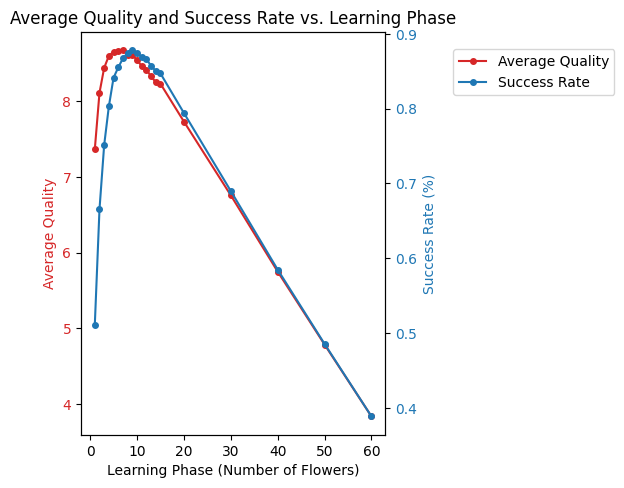

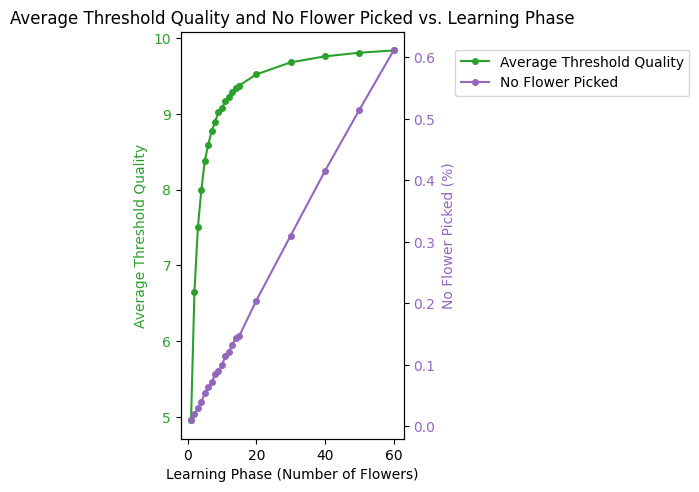

In [15]:
# prompt: plot one chart with 2 line and 2 y-axis, one for average quality, and one for success rate, learning phase being x-axis, and then another chart of average threshold quality and no tree picked, both chart with legend on the right, outside

import matplotlib.pyplot as plt
import numpy as np

# Extract data for plotting
learning_phases = list(results.keys())
avg_qualities = [result[0] for result in results.values()]
success_rates = [result[2] for result in results.values()]
avg_thresholds = [result[5] for result in results.values()]
no_tree_percentages = [result[4] for result in results.values()]

# Create the first plot (Average Quality and Success Rate)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Learning Phase (Number of Flowers)')
ax1.set_ylabel('Average Quality', color=color)
ax1.plot(learning_phases, avg_qualities, color=color, marker='o', markersize=4, label='Average Quality')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Success Rate (%)', color=color)
ax2.plot(learning_phases, success_rates, color=color, marker='o', markersize=4, label='Success Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend outside the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1.2, 0.9))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Quality and Success Rate vs. Learning Phase')
plt.show()

# Create the second plot (Average Threshold Quality and No Tree Picked)
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Learning Phase (Number of Flowers)')
ax1.set_ylabel('Average Threshold Quality', color=color)
ax1.plot(learning_phases, avg_thresholds, color=color, marker='o', markersize=4, label='Average Threshold Quality')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('No Flower Picked (%)', color=color)
ax2.plot(learning_phases, no_tree_percentages, color=color, marker='o', markersize=4, label='No Flower Picked')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend outside the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1.2, 0.9))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Threshold Quality and No Flower Picked vs. Learning Phase')
plt.show()


Second test if benchmark = 9

Learning Phase: 1 trees - Average Quality: 7.397 ± 2.323, Success Rate: 32.16% ± 0.467, No Tree Picked: 0.95%, Average Threshold Quality: 5.011 ± 2.892
Learning Phase: 2 trees - Average Quality: 8.140 ± 2.022, Success Rate: 45.55% ± 0.498, No Tree Picked: 2.03%, Average Threshold Quality: 6.688 ± 2.349
Learning Phase: 3 trees - Average Quality: 8.467 ± 1.949, Success Rate: 54.04% ± 0.498, No Tree Picked: 2.87%, Average Threshold Quality: 7.506 ± 1.915
Learning Phase: 4 trees - Average Quality: 8.549 ± 2.161, Success Rate: 60.38% ± 0.489, No Tree Picked: 4.55%, Average Threshold Quality: 7.983 ± 1.643
Learning Phase: 5 trees - Average Quality: 8.667 ± 2.199, Success Rate: 65.61% ± 0.475, No Tree Picked: 4.99%, Average Threshold Quality: 8.322 ± 1.424
Learning Phase: 6 trees - Average Quality: 8.671 ± 2.390, Success Rate: 69.72% ± 0.459, No Tree Picked: 6.35%, Average Threshold Quality: 8.594 ± 1.217
Learning Phase: 7 trees - Average Quality: 8.707 ± 2.446, Success Rate: 72.77% ± 0.445, 

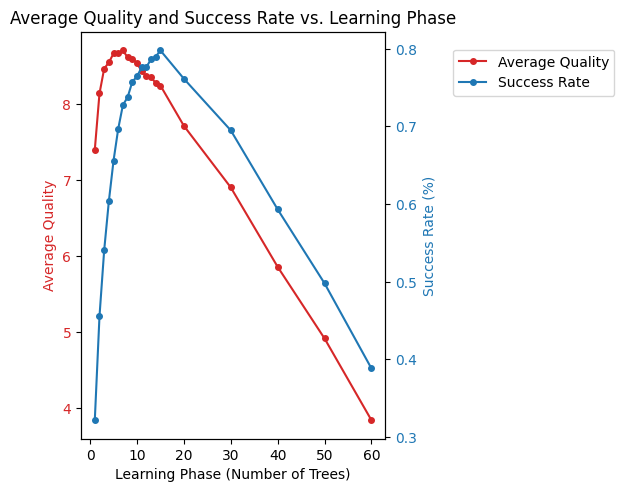

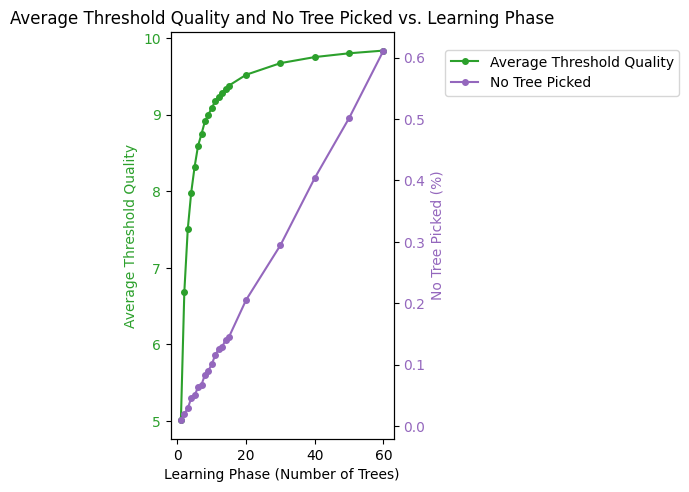

In [16]:
import numpy as np
def pick_tree_and_threshold(learning_phase):
    n_trees = np.random.randint(80, 121)
    tree_qualities = np.random.uniform(0, 10, size=n_trees)
    threshold_quality = np.max(tree_qualities[:min(learning_phase, n_trees)])

    chosen_tree_quality = 0
    for i in range(min(learning_phase, n_trees), n_trees):
        if tree_qualities[i] >= threshold_quality:
            chosen_tree_quality = tree_qualities[i]
            break

    return chosen_tree_quality, threshold_quality

def evaluate_strategy_with_threshold(learning_phases, n_simulations=10000):
    results = {}

    for learning_phase in learning_phases:
        chosen_qualities = []
        thresholds = []
        no_tree_count = 0

        for _ in range(n_simulations):
            quality, threshold = pick_tree_and_threshold(learning_phase)
            if quality == 0:
                no_tree_count += 1
            chosen_qualities.append(quality)
            thresholds.append(threshold)

        average_quality = np.mean(chosen_qualities)
        std_dev_quality = np.std(chosen_qualities)

        success_rate = np.mean([1 if q >= 9 else 0 for q in chosen_qualities])
        std_dev_success_rate = np.std([1 if q >= 9 else 0 for q in chosen_qualities])

        no_tree_percentage = no_tree_count / n_simulations

        # Analyze threshold quality distribution
        avg_threshold = np.mean(thresholds)
        std_dev_threshold = np.std(thresholds)

        results[learning_phase] = (average_quality, std_dev_quality, success_rate, std_dev_success_rate, no_tree_percentage, avg_threshold, std_dev_threshold)

    return results

# Define the learning phases to test (1 to 60)
learning_phases = list(range(1, 16)) + [20, 30, 40, 50, 60]

# Evaluate the strategy for each learning phase
results = evaluate_strategy_with_threshold(learning_phases)

# Print the results
for phase, (avg_quality, std_dev_quality, success_rate, std_dev_success_rate, no_tree_percentage, avg_threshold, std_dev_threshold) in results.items():
    print(f"Learning Phase: {phase} trees - Average Quality: {avg_quality:.3f} ± {std_dev_quality:.3f}, "
          f"Success Rate: {success_rate:.2%} ± {std_dev_success_rate:.3f}, "
          f"No Tree Picked: {no_tree_percentage:.2%}, "
          f"Average Threshold Quality: {avg_threshold:.3f} ± {std_dev_threshold:.3f}")


    # prompt: plot one chart with 2 line and 2 y-axis, one for average quality, and one for success rate, learning phase being x-axis, and then another chart of average threshold quality and no tree picked, both chart with legend on the right, outside

import matplotlib.pyplot as plt
import numpy as np

# Extract data for plotting
learning_phases = list(results.keys())
avg_qualities = [result[0] for result in results.values()]
success_rates = [result[2] for result in results.values()]
avg_thresholds = [result[5] for result in results.values()]
no_tree_percentages = [result[4] for result in results.values()]

# Create the first plot (Average Quality and Success Rate)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Learning Phase (Number of Trees)')
ax1.set_ylabel('Average Quality', color=color)
ax1.plot(learning_phases, avg_qualities, color=color, marker='o', markersize=4, label='Average Quality')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Success Rate (%)', color=color)
ax2.plot(learning_phases, success_rates, color=color, marker='o', markersize=4, label='Success Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend outside the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1.2, 0.9))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Quality and Success Rate vs. Learning Phase')
plt.show()

# Create the second plot (Average Threshold Quality and No Tree Picked)
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Learning Phase (Number of Trees)')
ax1.set_ylabel('Average Threshold Quality', color=color)
ax1.plot(learning_phases, avg_thresholds, color=color, marker='o', markersize=4, label='Average Threshold Quality')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:purple'
ax2.set_ylabel('No Tree Picked (%)', color=color)
ax2.plot(learning_phases, no_tree_percentages, color=color, marker='o', markersize=4, label='No Tree Picked')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend outside the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1.2, 0.9))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Average Threshold Quality and No Tree Picked vs. Learning Phase')
plt.show()
